In [40]:
using PyPlot
using Distributions

#### generate fake dataset

In [58]:
dist = Normal(0.0, 3.0)
dist0 = Normal(-2.5, 1.0)
dist1 = Normal(2.5, 1.0)

n_samples = 50
n_half = 25
X = rand(dist, n_samples);
Y = [rand(dist0, n_half); rand(dist1, n_half)];
A = [X Y]
category = map(t -> convert(Int, t), Y .> 0);

θ = π * 2 / 7;
transform_matrix = [[cos(θ) sin(θ)]; [-sin(θ) cos(θ)]];
offset = [1.5 2.7];

A = A * transform_matrix + repmat(offset, n_samples);

#### plot the seperable data

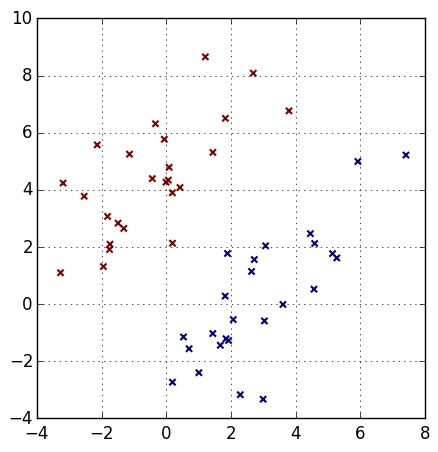

In [59]:
fig = figure(figsize=(5, 5))
scatter(A[:,1], A[:,2], c=category, marker="x", linewidth=1.5)
grid()

#### logistic regression   
  
**idea**: use $ f(\vec{x}, \vec{w}) = \frac{1}{1 + e^{- \vec{w}^{T} \vec{x}}} $ to seperate the space, if $ f(\vec{x}, \vec{w}) > threshold $ then category \#1, else category \#0  
  
**why**: vector space model, check properties of $ g(z) = \frac{1}{1 + e^{-z}} $, it's like binary output with sharpe transition curve, so we can use it to seperate the space.  
$ \vec{w}^{T} \vec{x} $ is to fit the rotation and offset. e.g. in 2 dimension, $ w = [w_0, w_1, offset] $, $ x = [x, y, 1] $, the inclusion of offset and 1 is for convenience, it's equivalent to $ [w_0, w_1]^{T} * [x, y] + offset $  
  
**how**:  
define loss function $ L(y, f(x; w)) = \sum \frac{1}{N} \{-y_i log[f(\vec{x_i}; \vec{w})] - (1 - y_i) log[1 - f(\vec{x_i}; \vec{w})]\} $  
to minimize the loss function, we can calculate $ \nabla_{\vec{w}} $  
note for $ g(z) = \frac{1}{1 + e^{-z}} $, $ g'(z) = g(z) [1 - g(z)] $  
$ \nabla_{\vec{w}} L = \sum \frac{1}{N} \{ - y_i \frac{1}{f(\vec{x_i}; \vec{w})} \nabla_{\vec{w}} f (\vec{x_i}; \vec{w}) + (1 - y_i) \frac{1}{1 - f(\vec{x_i}; \vec{w})} \nabla_{\vec{w}} f (\vec{x_i}; \vec{w})\} $  
$ \nabla_{\vec{w}} L = \sum \frac{1}{N} \{ - y_i [1 - f(\vec{x_i}; \vec{w})] \vec{x_i} + (1 - y_i) f(\vec{x_i}; \vec{w}) \vec{x_i} \} $  
$ \nabla_{\vec{w}}L = \sum \frac{1}{N} (- y_i + f(\vec{x_i}; \vec{w})) \vec{x_i} $  
convex optimization, use gradient descent  

In [158]:
# init
w = randn(3) * 10;
# w[1:2] is unit direction vector, w[3] is offset
w[1:2] /= norm(w[1:2]);

learning_rate = 1.5;

# add offset column
AA = [A ones(n_samples)]

function gradient()
    return mean(repmat(-category + 1 ./ (1 + exp(-AA * w)), 1, 3) .* AA, 1)'
end

gradient (generic function with 1 method)

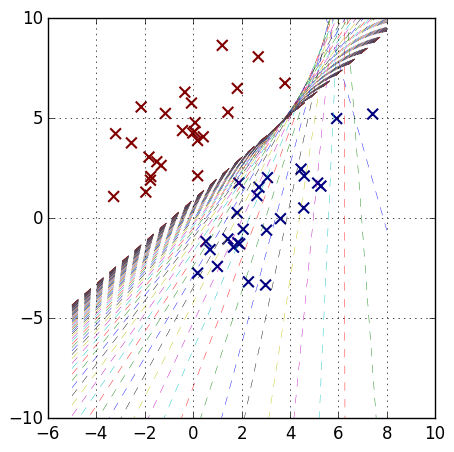

In [159]:
fig = figure(figsize=(5, 5))
scatter(A[:,1], A[:,2], c=category, marker="x", linewidth=1.5, s=60)
grid()
hold("on")

ww = w
w -= learning_rate * gradient()
w[1:2] /= norm(w[1:2])

vx = linspace(-5.0, 8.0, 50)

while norm(w - ww) > 1e-3
    vy = -(w[3] + w[1] * vx) / w[2]
    plot(vx, vy, "--", linewidth=0.3)
    
    ww = w
    w -= learning_rate * gradient()
    w[1:2] /= norm(w[1:2])
end

ylim([-10, 10]);

#### graph above shows how it converges to the seperation line from random init

#### TODO: SGD